# Simple Linear Regression

Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression.

The key point in Simple Linear Regression is that the dependent variable must be a continuous/real value. However, the independent variable can be measured on continuous or categorical values.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('student_scores - student_scores.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Understanding the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


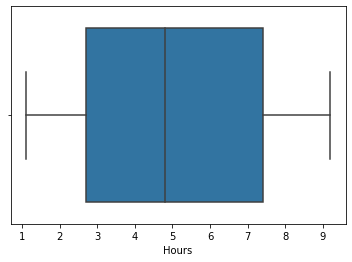

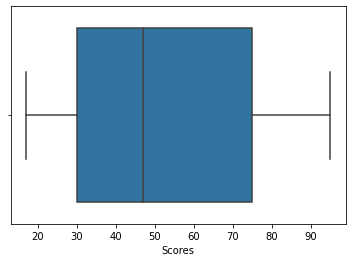

In [5]:
for i in data.columns:
    sb.boxplot(data[i])
    plt.show()

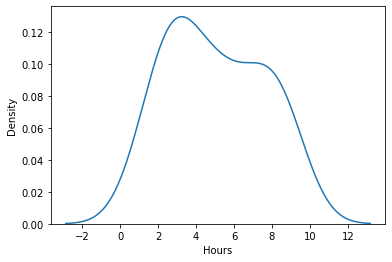

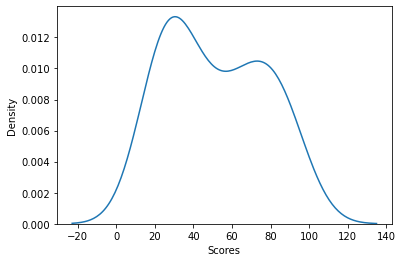

In [6]:
for i in data.columns:
    sb.kdeplot(data[i])
    plt.show()

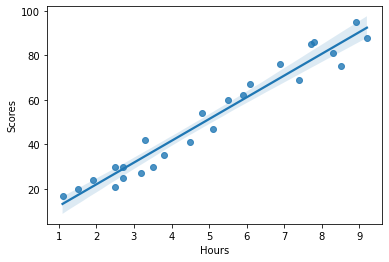

In [7]:
sb.regplot(x = data['Hours'], y = data['Scores'])
plt.show()

# Splitting the Data

In [8]:
X = data[['Hours']]
y = data['Scores']

In [9]:
# X = data.iloc[:, :-1].values  
# y = data.iloc[:, 1].values 

In [10]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [11]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) 

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (8, 1), (17,), (8,))

## First we try to understand in the OLS Method

In [13]:
import statsmodels.api as sm

In [14]:
x_cons = sm.add_constant(X_train)

In [15]:
model = sm.OLS(y_train, x_cons).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.15e-11
Time:                        23:20:44   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

## Linear Regression from Sklearn

In [17]:
from sklearn.linear_model import LinearRegression  

# Training the Model

In [18]:
lr = LinearRegression()  
lr_model = lr.fit(X_train, y_train) 

# Manual Calculation of Linear Regression

In [19]:
# y = mx + c

ll = lr_model.coef_*X+lr_model.intercept_

In [20]:
ll

,Hours
0,26.174428
1,51.840886
2,33.084628
3,85.404715
4,36.046143
5,16.302714
6,92.314915
7,55.789571
8,83.430372
9,28.148771


# Plotting the Actual and Predicted

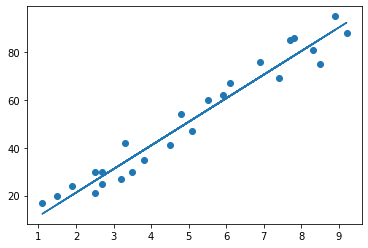

In [187]:
plt.scatter(X, y)
plt.plot(X, ll);
plt.show()

## Predicts with in-built function

In [22]:
y_pred = lr_model.predict(X_test)

In [23]:
y_pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

In [24]:
y_test

9     25
22    35
13    42
11    62
5     20
19    69
23    76
21    54
Name: Scores, dtype: int64

## Creating the Data Frame with Actual, Predicted and the Residuals (Diff. btw Actual and Predicted)

In [25]:
predict_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': y_test - y_pred })

In [26]:
predict_actual

,Actual,Predicted,Residuals
9,25,28.148771,-3.148771
22,35,39.007657,-4.007657
13,42,34.071800,7.928200
11,62,59.738257,2.261743
5,20,16.302714,3.697286
19,69,74.545829,-5.545829
23,76,69.609972,6.390028
21,54,48.879371,5.120629


## Model Performance

In [29]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.9309458862687437

# Predicting the Score with the given value of 9.25 hours

In [30]:
ans = lr_model.predict(np.array([[9.25]]))

In [31]:
ans[0]

92.80850057353504

## Business Inference

From the Predictions we can say that if a student studies for 9.25 hours, the Student can score upto 93 marks

# Model Evaluation 

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [33]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)

Mean Squared Error 25.678419573283865


In [34]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)

Root Mean Squared Error 5.0673878451608445


In [35]:
print('Mean Absolute Error:', 
     mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.762517892332275


In [36]:
print('Mean Absolute Percentage Error:', 
     mean_absolute_percentage_error(y_test, y_pred)) 

Mean Absolute Percentage Error: 0.1137307677711564
